**(1) Data Description**
There are 2 files for the data: players.csv and sessions.csv
- The data was collected by a research group at UBC in Computer Science which is led by Frank Wood. They set up a MineCraft serverLinks to an external site and recorded the players' actions as they navigated through the world.
- The dataset's are not in a tidy format. The "end_time" and "start_time" may have to be separated into more variables where date and time are separate columns.
  
**players.csv**
- 196 observations (196 rows)
- Mean of Age: 21.14
- Mean of played_hours: 5.85
- 7 variables
     - played_hours
       + A double variable (number that includes decimals) that reports the number of MineCraft hours played by
         each individual.
     - Age 
       + A double variable that report's the player's age.
     - experience 
       + A character variable with 5 categories: "Veteran", "Pro", "Regular", "Amateur", and "Beginner". It indicates
         the level of MineCraft experience the individual player has. 
     - hashedEmail
       + A character variable that reports a player's hashed email address.
     - name
       + A character variable that reports a player's first name.
     - gender
       + A character variable that reports a player's gender.
     - subscribe
       + A logical vector variable (true or false) that tells you if a player is subscribed to a game-related
         newsletter.


    **sessions.csv**
- 1535 observations (1535 rows)
- 5 variables
     - original_start_time
       + A double variable that reports the "start_time" in UNIX time (milliseconds).
     - original_end_time
       + A double variable that reports the "end_time" in UNIX time (milliseconds).
     - hashedEmail
       + A character variable that reports a player's hashed email address.
     - start_time
       + A character variable that reports the start date and time of an individual playing MineCraft.
     - end_time
       + A character variable that reports the end date and time of an individual playing MineCraft.
            
          

**(2) Questions**

Broad Question:
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific Question:
Can a player’s experience level predict whether they are subscribed to a game-related newsletter in the players.csv dataset?

- The players.csv dataset will address the specific question as it contains both subscribe (true/false) and player experience (beginner to veteran).
- To wrangle the data, subscribe and experience will be turned to factor variables, TRUE/FALSE will be turned to Yes/No, and experience will be ordered from level of the player's experience from "Beginner" to "Veteran".

**(3) Exploratory Data Analysis and Visualization:**

In [14]:
library(tidyverse)
players <- read_csv("https://raw.githubusercontent.com/Ranaaelhosary/DSCI-100-Planning-Stage-Individual/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/Ranaaelhosary/DSCI-100-Planning-Stage-Individual/refs/heads/main/sessions.csv")

In [16]:
players <- players |>
  mutate( subscribe = factor(subscribe, labels = c("No", "Yes")),
    experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")))

In [34]:
#Mean of quantitative variables
mean_age <- mean(players$Age, na.rm = TRUE)
mean_played_hours <- mean(players$played_hours, na.rm = TRUE)

mean_table <- tibble(Variable = c("Age", "played_hours"),
  Mean = c(mean_age, mean_played_hours))

mean_table

Variable,Mean
<chr>,<dbl>
Age,21.139175
played_hours,5.845918


In [54]:
#Number of subscribed players in each experience level
players |>
  filter(subscribe == "Yes") |>  
  group_by(experience) |>         
  summarise(count = n()) 

experience,count
<fct>,<int>
Beginner,27
Amateur,45
Regular,29
Pro,10
Veteran,33


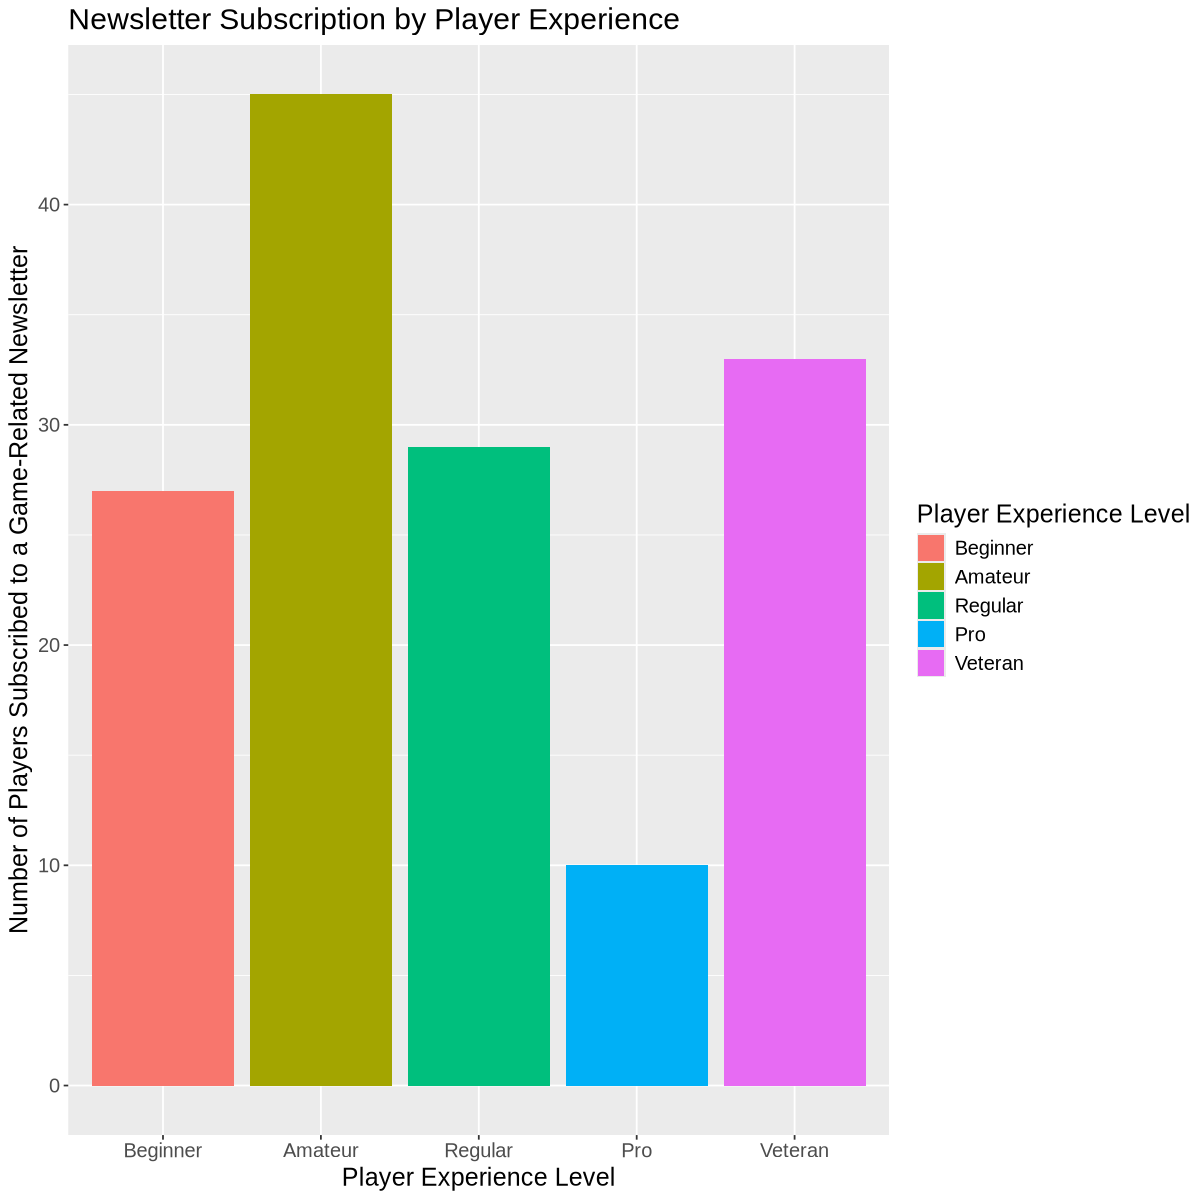

In [53]:
#Bar Plot of Data
subscribed_counts <- players |>
  filter(subscribe == "Yes")

options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(subscribed_counts, aes(x = experience, fill = experience)) +
    geom_bar() +
    theme(text = element_text(size = 15)) +
          labs(title = "Newsletter Subscription by Player Experience",
            x = "Player Experience Level",
            y = "Number of Players Subscribed to a Game-Related Newsletter",
            fill = "Player Experience Level")

The bar plot created shows the top MineCraft player experience level that is subscribed to a game-related newletter is the Amateur experience level (45 subscriptions), while the least is Pro (10 subscriptions) in the players.csv dataset. A limitation in this plot is that it only looks at one player characteristic (experience) while there could be more at play (age, hours_played, etc.)